In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Pyspark Tarea") \
    .config("spark.memory.offHeap.enabled","true") \
    .config("spark.memory.offHeap.size","10g").getOrCreate()
import pandas as pd

# Actividad 1


Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017,2020. Es decir una gráfica por  cada año donde
el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

In [3]:
# Cargar con pandas y convertir a Spark DataFrame
data2015_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2015")
data2017_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2017")
data2020_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2020")

# Convertir a Spark DataFrames
data2015 = spark.createDataFrame(data2015_pd)
data2017 = spark.createDataFrame(data2017_pd)
data2020 = spark.createDataFrame(data2020_pd)

In [4]:
data2015.show(5)

+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|         Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2015-01-22 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. Marte R. Gomez|MARTINEZ_ZAMBRANO...|  LIMÓN|DESARROLLO (creci...|         25.0|                  0.0|                 1.0|                  0.0|1.0|   4.0|
|2015-01-29 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. M

In [5]:
data2017.show(5)

+-------------------+--------+---------+--------------------+---------+---------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|      Comunidad|           Productor|Cultivo|     Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+---------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|2017-05-24 00:00:00|23.88426|-99.19092|177_THUE05-28-041...| VICTORIA|HUERTA SANTA FE|SILVIA MONTELONGO...|NARANJA|FRUCTIFICACIÓN|          0.0|                    0|                   1|                    0|  5|    21|
|2017-05-10 00:00:00|23.88426|-99.19092|177_THUE05-28-041...| VICTORIA|HUERTA SANTA FE|SILVIA MONTELONGO...|NARA

In [6]:
data2020.show(5)

+----------+--------------------+--------+---------+--------------------+---------+--------------------+-------+--------+-------------+----------+-------------+-----------------+-----------------+-----------+------------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+---+------+--------------------+
|     Fecha|           Ubicacion| Latitud| Longitud|           Productor|Municipio|           Localidad|Cultivo|Variedad|noProductores|Superficie|NoTrampasInst|Trampas_revisadas|DiaphorinaXTrampa|Observacion|Incidencia_Psilido|Fenologia_Brote_1|Adultos_Brote_1|Ninfas_Brote_1|Fenologia_Brote_2|Adultos_Brote_2|Ninfas_Brote_2|Fenologia_Brote_3|Adultos_Brote_3|Ninfas_Brote_3|Fenologia_Brote_4|Adultos_Brote_4|Ninfas_Brote_4|Mes|Semana|             Tecnico|
+----------+--------------------+--------+---------+--------------------+---------+-----

In [7]:
from pyspark.sql.functions import avg
print(2015)


#Filtremos los datos
data2015 = data2015.replace([float("inf"), float("-inf")], None, subset=["No_DiaphorinasXtrampa"]).dropna(subset=["No_DiaphorinasXtrampa"])
data2017 = data2017.replace([float("inf"), float("-inf")], None, subset=["No_DiaphorinasXtrampa"]).dropna(subset=["No_DiaphorinasXtrampa"])
data2020 = data2020.replace([float("inf"), float("-inf")], None, subset=["DiaphorinaXTrampa"]).dropna(subset=["DiaphorinaXTrampa"])



tabla2015 = data2015.groupBy("Mes").agg(avg("No_DiaphorinasXtrampa").alias("Promedio Diaphorina")).sort("Mes")
tabla2015.show(13)
print(2017)
tabla2017 = data2017.groupBy("Mes").agg(avg("No_DiaphorinasXtrampa").alias("Promedio Diaphorina")).sort("Mes")
tabla2017.show(13)
print(2020)
tabla2020 = data2020.groupBy("Mes").agg(avg("DiaphorinaXTrampa").alias("Promedio Diaphorina")).sort("Mes")
tabla2020.show(13)

2015
+----+--------------------+
| Mes| Promedio Diaphorina|
+----+--------------------+
| 1.0| 0.09230769230769231|
| 2.0| 0.11651014455591525|
| 3.0|  0.1608653846153846|
| 4.0| 0.10546153846153847|
| 5.0| 0.03711419505785071|
| 6.0|  0.0330448717948718|
| 7.0|0.039219707262054294|
| 8.0|  0.1148076923076923|
| 9.0| 0.15618589743589745|
|10.0|  0.1755189729254025|
|11.0| 0.07468346870520784|
|12.0| 0.02885593220338983|
+----+--------------------+

2017
+---+-------------------+
|Mes|Promedio Diaphorina|
+---+-------------------+
|  1|0.14972527472527472|
|  2|0.27774725274725276|
|  3|  0.566025641025641|
|  4|0.28214285714285714|
|  5| 0.5130494505494505|
|  6| 0.8178571428571428|
|  7|0.30354107648725215|
|  8| 0.5685606060606061|
|  9| 0.6445054945054945|
| 10| 0.5184065934065935|
| 11| 0.4181507337227525|
| 12| 0.1438186813186813|
+---+-------------------+

2020
+---+-------------------+
|Mes|Promedio Diaphorina|
+---+-------------------+
|  1|0.37856461359058624|
|  2|    0.7503

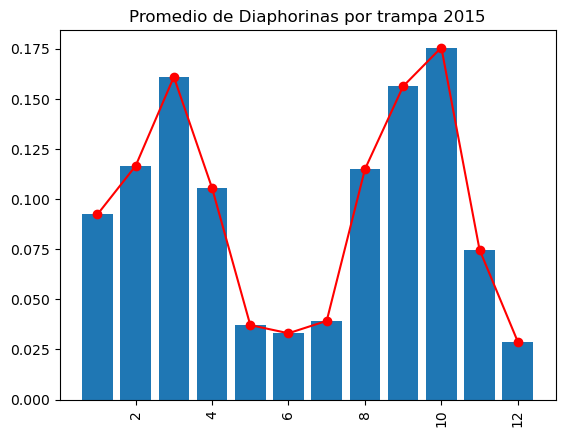

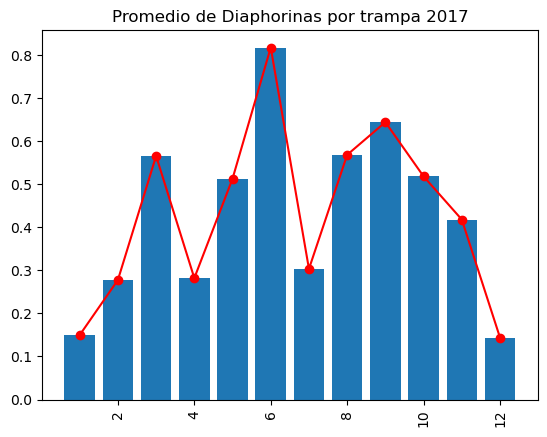

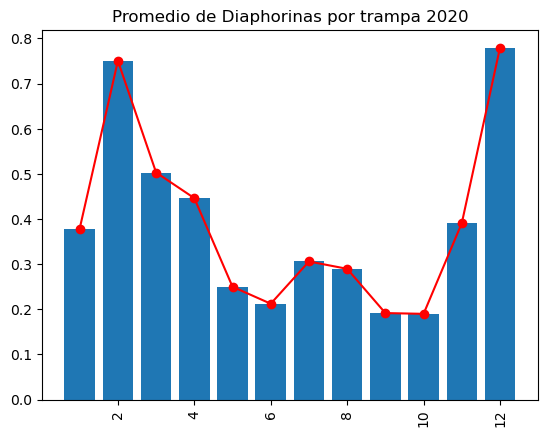

In [8]:
import matplotlib.pyplot as plt

# Convertir tabla2015 a Pandas
tabla2015_pd = tabla2015.toPandas()
plt.bar(tabla2015_pd['Mes'], tabla2015_pd['Promedio Diaphorina'])
plt.plot(tabla2015_pd['Mes'], tabla2015_pd['Promedio Diaphorina'], "o-", color="red")
plt.title("Promedio de Diaphorinas por trampa 2015")
plt.xticks(rotation=90)
plt.show()

# Convertir tabla2017 a Pandas
tabla2017_pd = tabla2017.toPandas()
plt.bar(tabla2017_pd['Mes'], tabla2017_pd['Promedio Diaphorina'])
plt.plot(tabla2017_pd['Mes'], tabla2017_pd['Promedio Diaphorina'], "o-", color="red")
plt.title("Promedio de Diaphorinas por trampa 2017")
plt.xticks(rotation=90)
plt.show()

# Convertir tabla2020 a Pandas
tabla2020_pd = tabla2020.toPandas()
plt.bar(tabla2020_pd['Mes'], tabla2020_pd['Promedio Diaphorina'])
plt.plot(tabla2020_pd['Mes'], tabla2020_pd['Promedio Diaphorina'], "o-", color="red")
plt.title("Promedio de Diaphorinas por trampa 2020")
plt.xticks(rotation=90)
plt.show()


# Actividad 2

Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes
del año 2020 pero sólo de un municipio.

In [9]:
data2020.show(5)

+----------+--------------------+--------+---------+--------------------+---------+--------------------+-------+--------+-------------+----------+-------------+-----------------+-----------------+-----------+------------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+---+------+--------------------+
|     Fecha|           Ubicacion| Latitud| Longitud|           Productor|Municipio|           Localidad|Cultivo|Variedad|noProductores|Superficie|NoTrampasInst|Trampas_revisadas|DiaphorinaXTrampa|Observacion|Incidencia_Psilido|Fenologia_Brote_1|Adultos_Brote_1|Ninfas_Brote_1|Fenologia_Brote_2|Adultos_Brote_2|Ninfas_Brote_2|Fenologia_Brote_3|Adultos_Brote_3|Ninfas_Brote_3|Fenologia_Brote_4|Adultos_Brote_4|Ninfas_Brote_4|Mes|Semana|             Tecnico|
+----------+--------------------+--------+---------+--------------------+---------+-----

In [10]:
data2020.select("Municipio").distinct().show()

+---------+
|Municipio|
+---------+
|  PADILLA|
| VICTORIA|
|  HIDALGO|
|   GUEMEZ|
|    LLERA|
+---------+



Decidamos al azar cual será el municipio.

In [20]:
import random 
municipios = data2020.select("Municipio").distinct().rdd.flatMap(lambda x: x).collect()
eleccion = random.choice(municipios)

print("Se seleccionó el municipio de", eleccion)

Se seleccionó el municipio de HIDALGO


In [21]:
from pyspark.sql.functions import col

#En caso de que se desee un municipio especifico usar el comando de abajo, sustituir por el nombre deseado
#eleccion='NOMBRE_DEL_MUNICIPIO'

# Filtrar el DataFrame de PySpark para el municipio seleccionado
data_muni_2020 = data2020.filter(col("Municipio") == eleccion)
data_muni_2020.show(5)


+----------+--------------------+---------+----------+--------------------+---------+--------------------+-------+--------+-------------+----------+-------------+-----------------+-----------------+-----------+------------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+---+------+--------------------+
|     Fecha|           Ubicacion|  Latitud|  Longitud|           Productor|Municipio|           Localidad|Cultivo|Variedad|noProductores|Superficie|NoTrampasInst|Trampas_revisadas|DiaphorinaXTrampa|Observacion|Incidencia_Psilido|Fenologia_Brote_1|Adultos_Brote_1|Ninfas_Brote_1|Fenologia_Brote_2|Adultos_Brote_2|Ninfas_Brote_2|Fenologia_Brote_3|Adultos_Brote_3|Ninfas_Brote_3|Fenologia_Brote_4|Adultos_Brote_4|Ninfas_Brote_4|Mes|Semana|             Tecnico|
+----------+--------------------+---------+----------+--------------------+---------

In [22]:
data_muni_2020 = data_muni_2020.groupBy("Mes").agg(avg("DiaphorinaXTrampa").alias("Promedio Diaphorina")).sort("Mes")
data_muni_2020.show(13)

+---+-------------------+
|Mes|Promedio Diaphorina|
+---+-------------------+
|  1|0.21842650103519667|
|  2| 0.7914746543778802|
|  3| 0.6036866359447005|
|  4|0.21076746849942726|
|  5|0.22863741339491916|
|  6| 0.2496551724137931|
|  7| 0.3608815426997245|
|  8|0.25504322766570603|
|  9|0.17343173431734318|
| 10|0.13294117647058823|
| 11| 0.2724177071509648|
| 12|0.41843971631205673|
+---+-------------------+



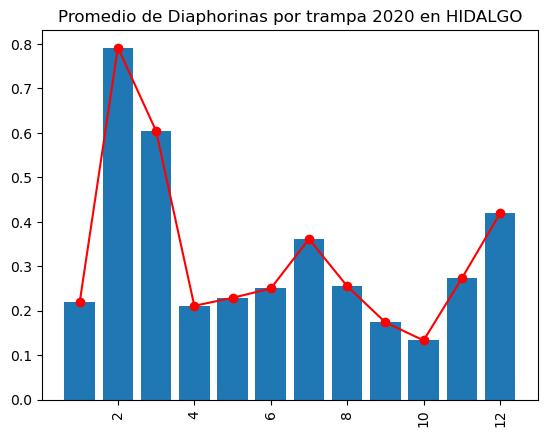

In [23]:
import matplotlib.pyplot as plt

# Convertir tabla2015 a Pandas
data_muni_2020_pd = data_muni_2020.toPandas()
plt.bar(data_muni_2020_pd['Mes'], data_muni_2020_pd['Promedio Diaphorina'])
plt.plot(data_muni_2020_pd['Mes'], data_muni_2020_pd['Promedio Diaphorina'], "o-", color="red")
plt.title('Promedio de Diaphorinas por trampa 2020 en '+str(eleccion))
plt.xticks(rotation=90)
plt.show()


# Actividad 3

Hacer una tabla donde la primera columna sea el mes, la segunda el índice
Id (por trampa) y la tercera el índice Cx para el año 2015.


In [24]:
data2015.show(5)

+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|         Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2015-01-22 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. Marte R. Gomez|MARTINEZ_ZAMBRANO...|  LIMÓN|DESARROLLO (creci...|         25.0|                  0.0|                 1.0|                  0.0|1.0|   4.0|
|2015-01-29 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. M

In [25]:
# Lista de nombres de los meses
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
         "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Crear un diccionario donde a cada mes le asocia un DataFrame con los datos de ese mes
data_por_mes = {}

# Recorrer los meses y filtrar los datos para cada mes
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes[mes] = data2015.filter(col("Mes") == float(i))

# Ahora `data_por_mes` contiene un DataFrame por cada mes


In [26]:
data_por_mes["Enero"].show(5)

+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|         Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2015-01-22 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. Marte R. Gomez|MARTINEZ_ZAMBRANO...|  LIMÓN|DESARROLLO (creci...|         25.0|                  0.0|                 1.0|                  0.0|1.0|   4.0|
|2015-01-29 00:00:00|24.11564|-99.03734|177_THUE05-28-030...|  PADILLA|Ej. M

In [27]:
data_por_mes["Junio"].show(5)

+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|           Comunidad|           Productor|Cultivo|     Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|2015-06-16 00:00:00|23.31842|-98.94338|177_THUE05-28-019...|    LLERA|EJIDO_PEDRO_JOSE_...|PARCELA_ESCOLAR_P...|  LIMÓN|FRUCTIFICACIÓN|          2.0|                  0.0|                 1.0|                  0.0|6.0|  25.0|
|2015-06-16 00:00:00|23.31856|-98.94485|177_THUE05-28-019...|    LLERA|EJIDO_PEDRO_JOSE_...|

In [29]:
# Crear un diccionario para las agrupaciones por mes
group_por_mes = {}

# Recorrer los meses y agrupar por promedio de trampa
for mes in meses:
    group_por_mes[mes] = data_por_mes[mes].groupBy("Ubicacion").agg(avg("No_DiaphorinasXtrampa").alias("Promedio Diaphorina"))
    

# Mostrar un ejemplo para el mes de Junio
group_por_mes["Enero"].show()

+--------------------+-------------------+
|           Ubicacion|Promedio Diaphorina|
+--------------------+-------------------+
|177_THUE05-28-030...|                0.0|
|177_THUE05-28-030...|                0.2|
|177_THUE05-28-019...|                0.5|
|177_THUE05-28-041...|                0.0|
|177_THUE05-28-030...|                0.0|
|177_THUE05-28-019...|                0.0|
|177_THUE05-28-043...|                0.0|
|177_THUE05-28-041...|                0.0|
|177_THUE05-28-043...|                0.0|
|177_THUE05-28-019...|                0.0|
|177_THUE05-28-030...|                0.0|
|177_THUE05-28-041...|                0.0|
|177_THUE05-28-019...|                0.0|
|177_THUE05-28-019...|                0.5|
|177_THUE05-28-019...| 0.3333333333333333|
|177_THUE05-28-041...|                0.0|
|177_THUE05-28-041...|                0.0|
|177_THUE05-28-019...|                0.0|
|177_THUE05-28-043...|                0.0|
|177_THUE05-28-043...|                0.0|
+----------

In [30]:
from pyspark.sql.functions import var_samp, mean, sum
variance_samp = group_por_mes["Enero"].agg(var_samp("Promedio Diaphorina").alias("Sample Variance"))
variance_samp.show()
mean = group_por_mes["Enero"].agg(mean("Promedio Diaphorina").alias("Sample mean"))
mean.show()

+-------------------+
|    Sample Variance|
+-------------------+
|0.08875463634897597|
+-------------------+

+-----------------+
|      Sample mean|
+-----------------+
|0.090251572327044|
+-----------------+



In [31]:
Id_por_mes = {}

# Recorrer los meses y agrupar por promedio de trampa
for mes in meses:
    varianza = group_por_mes[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes[mes] = varianza/mean if mean != 0 else 0

In [32]:
 Id_por_mes

{'Enero': 0.9834137407308141,
 'Febrero': 1.300030506748239,
 'Marzo': 1.8225820673593256,
 'Abril': 0.8705314199420886,
 'Mayo': 0.7660916405517643,
 'Junio': 1.436828958772477,
 'Julio': 1.6119562839881596,
 'Agosto': 2.679645288029218,
 'Septiembre': 3.1187368218002116,
 'Octubre': 4.229055906384309,
 'Noviembre': 2.043487232756662,
 'Diciembre': 2.128658217531819}

In [33]:
Cx_por_mes = {}

# Recorrer los meses y agrupar por promedio de trampa
for mes in meses:
    suma_promedio = group_por_mes[mes].agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]
    Cx_por_mes[mes] = (Id_por_mes[mes]-1)/(suma_promedio-1)

In [34]:
Cx_por_mes

{'Enero': -0.004384033287009487,
 'Febrero': 0.00033046040210912045,
 'Marzo': 0.0006560973618020543,
 'Abril': -0.00015758103707145903,
 'Mayo': -0.000810774209525947,
 'Junio': 0.00170137861255103,
 'Julio': 0.0020064140458628324,
 'Agosto': 0.0018777476668856547,
 'Septiembre': 0.0017405929938798207,
 'Octubre': 0.0023813974751165485,
 'Noviembre': 0.0016447979499645275,
 'Diciembre': 0.004011105434573793}

In [35]:
data = [(mes, Id_por_mes[mes], Cx_por_mes[mes]) for mes in meses]
df = spark.createDataFrame(data, ["Mes", "Id por mes", "Cx por mes"])

# Mostrar el DataFrame
df.show()

+----------+------------------+--------------------+
|       Mes|        Id por mes|          Cx por mes|
+----------+------------------+--------------------+
|     Enero|0.9834137407308141|-0.00438403328700...|
|   Febrero| 1.300030506748239|3.304604021091204...|
|     Marzo|1.8225820673593256|6.560973618020543E-4|
|     Abril|0.8705314199420886|-1.57581037071459...|
|      Mayo|0.7660916405517643|-8.10774209525947E-4|
|     Junio| 1.436828958772477| 0.00170137861255103|
|     Julio|1.6119562839881596|0.002006414045862...|
|    Agosto| 2.679645288029218|0.001877747666885...|
|Septiembre|3.1187368218002116|0.001740592993879...|
|   Octubre| 4.229055906384309|0.002381397475116...|
| Noviembre| 2.043487232756662|0.001644797949964...|
| Diciembre| 2.128658217531819|0.004011105434573793|
+----------+------------------+--------------------+



# Actividad 4

Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.

In [36]:
data2016_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2016")

data2018_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2018")

data2019_pd = pd.read_excel("capturas_2015-2020.xlsx", sheet_name="2019")

# Convertir a Spark DataFrames
data2016 = spark.createDataFrame(data2016_pd)
data2018 = spark.createDataFrame(data2018_pd)
data2019 = spark.createDataFrame(data2019_pd)

In [37]:
#Filtremos los datos
data2016 = data2016.replace([float("inf"), float("-inf")], None, subset=["No_DiaphorinasXtrampa"]).dropna(subset=["No_DiaphorinasXtrampa"])
data2018 = data2018.replace([float("inf"), float("-inf")], None, subset=["captura"]).dropna(subset=["captura"])
data2019 = data2019.replace([float("inf"), float("-inf")], None, subset=["DiaphorinaXTrampa"]).dropna(subset=["DiaphorinaXTrampa"])

In [38]:
data2016.show(5)

+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|           Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2016-01-04 00:00:00|23.31379| -98.9551|177_THUE05-28-019...|    LLERA|EJIDO_PEDRO_JOSE_...|  MANCILLA_ZEFERINO |NARANJA|DESARROLLO (creci...|          0.0|                    0|                   0|                    0|  1|     1|
|2016-01-04 00:00:00|23.27431| -98.8622|177_THUE05-28-019...|    LLE

In [39]:
data2018.show(5)

+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+
|              fecha| ano|semana|           name_thue|  latitud|  longitud|     fenologia|Revisada|captura|              campo|superficie|
+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920757|  -99.1087|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|      26.0|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920738|-99.108536|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920712| -99.10837|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920694| -99.10822|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|
|2018-01-03 00:00:00|2018| 

In [40]:
data2019.show(5)

+----------+--------------------+--------+---------+--------------------+---------+----------------+-------+----------+-------------+-----------------+-----------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+-----------------+---------------+--------------+---+------+
|     Fecha|           Ubicacion| Latitud| Longitud|           Productor|Municipio|       Localidad|Cultivo|Superficie|NoTrampasInst|Trampas_revisadas|DiaphorinaXTrampa|Fenologia_Brote_1|Adultos_Brote_1|Ninfas_Brote_1|Fenologia_Brote_2|Adultos_Brote_2|Ninfas_Brote_2|Fenologia_Brote_3|Adultos_Brote_3|Ninfas_Brote_3|Fenologia_Brote_4|Adultos_Brote_4|Ninfas_Brote_4|Mes|Semana|
+----------+--------------------+--------+---------+--------------------+---------+----------------+-------+----------+-------------+-----------------+-----------------+-----------------+---------------+--------------+-----------------+----------

In [41]:
from pyspark.sql.functions import month

#Podemos ver que los datos de 2018 no tienen la columna mes, así que habrá que añadirlo
data2018 = data2018.withColumn("Mes", month(data2018["fecha"]))
data2018.show(5)

+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+---+
|              fecha| ano|semana|           name_thue|  latitud|  longitud|     fenologia|Revisada|captura|              campo|superficie|Mes|
+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+---+
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920757|  -99.1087|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|      26.0|  1|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920738|-99.108536|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|  1|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920712| -99.10837|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|  1|
|2018-01-03 00:00:00|2018|     1|177_THUE05-28-013...|23.920694| -99.10822|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|  1|

In [42]:
meses=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
#Creamos un diccionario donde a cada mes le asocia un dataframe con los datos de ese mes para el 2016

data_por_mes_2016 = {}
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes_2016[mes] = data2016.filter(col("Mes") == i)

data_por_mes_2017 = {}
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes_2017[mes] = data2017.filter(col("Mes") == i)

data_por_mes_2018 = {}
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes_2018[mes] = data2018.filter(col("Mes") == i)

data_por_mes_2019 = {}
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes_2019[mes] = data2019.filter(col("Mes") == i)

data_por_mes_2020= {}
for i, mes in enumerate(meses, start=1):  # `enumerate` empieza en 1
    data_por_mes_2020[mes] = data2020.filter(col("Mes") == i)

In [43]:
data_por_mes_2016["Enero"].show(5)

+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|           Comunidad|           Productor|Cultivo|           Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+--------------------+--------------------+-------+--------------------+-------------+---------------------+--------------------+---------------------+---+------+
|2016-01-04 00:00:00|23.31379| -98.9551|177_THUE05-28-019...|    LLERA|EJIDO_PEDRO_JOSE_...|  MANCILLA_ZEFERINO |NARANJA|DESARROLLO (creci...|          0.0|                    0|                   0|                    0|  1|     1|
|2016-01-04 00:00:00|23.27431| -98.8622|177_THUE05-28-019...|    LLE

In [44]:
data_por_mes_2017["Junio"].show(5)

+-------------------+--------+---------+--------------------+---------+---------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|              Fecha| Latitud| Longitud|           Ubicacion|Municipio|      Comunidad|           Productor|Cultivo|     Fenologia|Superficie_ha|No_Trampas_Instaladas|No_Trampas_Revisadas|No_DiaphorinasXtrampa|Mes|Semana|
+-------------------+--------+---------+--------------------+---------+---------------+--------------------+-------+--------------+-------------+---------------------+--------------------+---------------------+---+------+
|2017-06-07 00:00:00|23.88426|-99.19092|177_THUE05-28-041...| VICTORIA|HUERTA SANTA FE|SILVIA MONTELONGO...|NARANJA|FRUCTIFICACIÓN|          0.0|                    0|                   1|                    3|  6|    23|
|2017-06-07 00:00:00|23.88433|-99.19078|177_THUE05-28-041...| VICTORIA|HUERTA SANTA FE|SILVIA MONTELONGO...|NARA

In [45]:
data_por_mes_2018["Abril"].show(5)

+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+---+
|              fecha| ano|semana|           name_thue|  latitud|  longitud|     fenologia|Revisada|captura|              campo|superficie|Mes|
+-------------------+----+------+--------------------+---------+----------+--------------+--------+-------+-------------------+----------+---+
|2018-04-11 00:00:00|2018|    15|177_THUE05-28-013...|23.920753| -99.10868|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|      26.0|  4|
|2018-04-11 00:00:00|2018|    15|177_THUE05-28-013...|23.920774| -99.10854|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|  4|
|2018-04-11 00:00:00|2018|    15|177_THUE05-28-013...|23.920746| -99.10837|FRUCTIFICACION|      Si|    1.0|HUERTA SANTA MARTHA|       0.0|  4|
|2018-04-11 00:00:00|2018|    15|177_THUE05-28-013...|23.920725|-99.108215|FRUCTIFICACION|      Si|    0.0|HUERTA SANTA MARTHA|       0.0|  4|

In [46]:
meses=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
#Hacemos el diccionario con los group by, donde a cada mes le asocia la agrupación por promedio de trampa para cada uno de los años.
group_por_mes_2016 = {}
for mes in meses:
    group_por_mes_2016[mes] = data_por_mes_2016[mes].groupBy("Ubicacion").agg(avg("No_DiaphorinasXtrampa").alias("Promedio Diaphorina"))

group_por_mes_2017 = {}
for mes in meses:
    group_por_mes_2017[mes] = data_por_mes_2017[mes].groupBy("Ubicacion").agg(avg("No_DiaphorinasXtrampa").alias("Promedio Diaphorina"))

group_por_mes_2018 = {}
for mes in meses:
    group_por_mes_2018[mes] = data_por_mes_2018[mes].groupBy("name_thue").agg(avg("captura").alias("Promedio Diaphorina"))

group_por_mes_2019 = {}
for mes in meses:
    group_por_mes_2019[mes] = data_por_mes_2019[mes].groupBy("Ubicacion").agg(avg("DiaphorinaXTrampa").alias("Promedio Diaphorina"))

group_por_mes_2020 = {}
for mes in meses:
    group_por_mes_2020[mes] = data_por_mes_2020[mes].groupBy("Ubicacion").agg(avg("DiaphorinaXTrampa").alias("Promedio Diaphorina"))


In [47]:
group_por_mes_2019["Diciembre"].show(10)

+--------------------+-------------------+
|           Ubicacion|Promedio Diaphorina|
+--------------------+-------------------+
|THUE05/28-030/205...|                0.0|
|THUE05/28-013/064...|                0.0|
|THUE05/28-013/065...|                0.0|
|THUE05/28-030/129...|                0.0|
|THUE05/28-013/065...|                0.0|
|THUE05/28-013/070...|                2.0|
|THUE05/28-013/064...|                0.0|
|THUE05/28-013/067...|                0.0|
|THUE05/28-013/064...|                0.0|
|THUE05/28-030/127...|                0.0|
+--------------------+-------------------+
only showing top 10 rows



In [48]:
#Ahora para sacar el Id hacemos 
meses=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

Id_por_mes_2016 = {}
for mes in meses:
    varianza = group_por_mes_2016[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes_2016[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes_2016[mes] = varianza/mean if mean != 0 else 0

Id_por_mes_2017 = {}
for mes in meses:
    varianza = group_por_mes_2017[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes_2017[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes_2017[mes] = varianza/mean if mean != 0 else 0
    
Id_por_mes_2018 = {}
for mes in meses:
    varianza = group_por_mes_2018[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes_2018[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes_2018[mes] = varianza/mean if mean != 0 else 0
    
Id_por_mes_2019 = {}
for mes in meses:
    varianza = group_por_mes_2019[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes_2019[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes_2019[mes] = varianza/mean if mean != 0 else 0

Id_por_mes_2020 = {}
for mes in meses:
    varianza = group_por_mes_2020[mes].select(var_samp("Promedio Diaphorina").alias("Varianza")).collect()[0]["Varianza"]
    mean = group_por_mes_2020[mes].select(avg("Promedio Diaphorina").alias("Media")).collect()[0]["Media"]
    Id_por_mes_2020[mes] = varianza/mean if mean != 0 else 0

In [49]:
Id_por_mes

{'Enero': 0.9834137407308141,
 'Febrero': 1.300030506748239,
 'Marzo': 1.8225820673593256,
 'Abril': 0.8705314199420886,
 'Mayo': 0.7660916405517643,
 'Junio': 1.436828958772477,
 'Julio': 1.6119562839881596,
 'Agosto': 2.679645288029218,
 'Septiembre': 3.1187368218002116,
 'Octubre': 4.229055906384309,
 'Noviembre': 2.043487232756662,
 'Diciembre': 2.128658217531819}

In [50]:
Id_por_mes_2016

{'Enero': 0.9458396859432118,
 'Febrero': 5.191458983348468,
 'Marzo': 5.233124698130214,
 'Abril': 1.6015004962387858,
 'Mayo': 1.6318545114222118,
 'Junio': 0.8169084899266119,
 'Julio': 1.0709767272965214,
 'Agosto': 1.6305724139379385,
 'Septiembre': 1.8272577945825137,
 'Octubre': 1.3757699185645569,
 'Noviembre': 9.167694736789926,
 'Diciembre': 0.6817100112271732}

In [51]:
Id_por_mes_2017

{'Enero': 3.4787533625277574,
 'Febrero': 3.8840517430006787,
 'Marzo': 3.130191039959599,
 'Abril': 2.513581767142871,
 'Mayo': 5.174449745487423,
 'Junio': 22.104664436954057,
 'Julio': 4.069777991358284,
 'Agosto': 5.187896164122712,
 'Septiembre': 4.089780902025913,
 'Octubre': 6.835402612372052,
 'Noviembre': 4.719881734027973,
 'Diciembre': 4.251332075076521}

In [52]:
Id_por_mes_2018

{'Enero': 1.1318036749749059,
 'Febrero': 1.3494294934409872,
 'Marzo': 7.3738470308675135,
 'Abril': 1.6150279887189436,
 'Mayo': 4.089305421199824,
 'Junio': 1.6608865286399415,
 'Julio': 1.4454828352193425,
 'Agosto': 1.4103297332518787,
 'Septiembre': 1.897404218414596,
 'Octubre': 4.317235540459501,
 'Noviembre': 3.6056946039035576,
 'Diciembre': 5.1932274849106514}

In [53]:
Id_por_mes_2019

{'Enero': 1.9358692447351835,
 'Febrero': 0,
 'Marzo': 1.519169328207119,
 'Abril': 1.5579382040786736,
 'Mayo': 1.6864616560017958,
 'Junio': 1.505744268643203,
 'Julio': 1.4040290065302394,
 'Agosto': 1.2050516967929235,
 'Septiembre': 2.524057509524151,
 'Octubre': 2.314924670118272,
 'Noviembre': 2.2200016987936753,
 'Diciembre': 1.7826956644705323}

In [54]:
Id_por_mes_2020

{'Enero': 3.088598417265408,
 'Febrero': 2.781782223605737,
 'Marzo': 2.304639948661255,
 'Abril': 4.067846184470863,
 'Mayo': 1.8128233281209674,
 'Junio': 1.367248824023087,
 'Julio': 30.278160345980208,
 'Agosto': 2.255536045361095,
 'Septiembre': 1.7048854697019238,
 'Octubre': 1.4539528305810894,
 'Noviembre': 2.314942149819222,
 'Diciembre': 3.3540340670016127}

In [55]:
dicts = [Id_por_mes, Id_por_mes_2016, Id_por_mes_2017, Id_por_mes_2018, Id_por_mes_2019, Id_por_mes_2020]
years = [2015, 2016, 2017, 2018, 2019, 2020]

mes_año = []
valores = []

for i, dic in enumerate(dicts):
    for mes, valor in dic.items():
        mes_año.append(f"{mes}_{years[i]}")  # Combinar mes y año en una sola string
        valores.append(float(valor))           # Asegurarse de que todos los valores sean flotantes

# Crear data2 como una lista de tuplas
data2 = list(zip(mes_año, valores))

# Crear el DataFrame
df_final = spark.createDataFrame(data2, ["Mes_Año", "Id por mes"])

# Mostrar el DataFrame
df_final.show(72)

+---------------+------------------+
|        Mes_Año|        Id por mes|
+---------------+------------------+
|     Enero_2015|0.9834137407308141|
|   Febrero_2015| 1.300030506748239|
|     Marzo_2015|1.8225820673593256|
|     Abril_2015|0.8705314199420886|
|      Mayo_2015|0.7660916405517643|
|     Junio_2015| 1.436828958772477|
|     Julio_2015|1.6119562839881596|
|    Agosto_2015| 2.679645288029218|
|Septiembre_2015|3.1187368218002116|
|   Octubre_2015| 4.229055906384309|
| Noviembre_2015| 2.043487232756662|
| Diciembre_2015| 2.128658217531819|
|     Enero_2016|0.9458396859432118|
|   Febrero_2016| 5.191458983348468|
|     Marzo_2016| 5.233124698130214|
|     Abril_2016|1.6015004962387858|
|      Mayo_2016|1.6318545114222118|
|     Junio_2016|0.8169084899266119|
|     Julio_2016|1.0709767272965214|
|    Agosto_2016|1.6305724139379385|
|Septiembre_2016|1.8272577945825137|
|   Octubre_2016|1.3757699185645569|
| Noviembre_2016| 9.167694736789926|
| Diciembre_2016|0.6817100112271732|
|

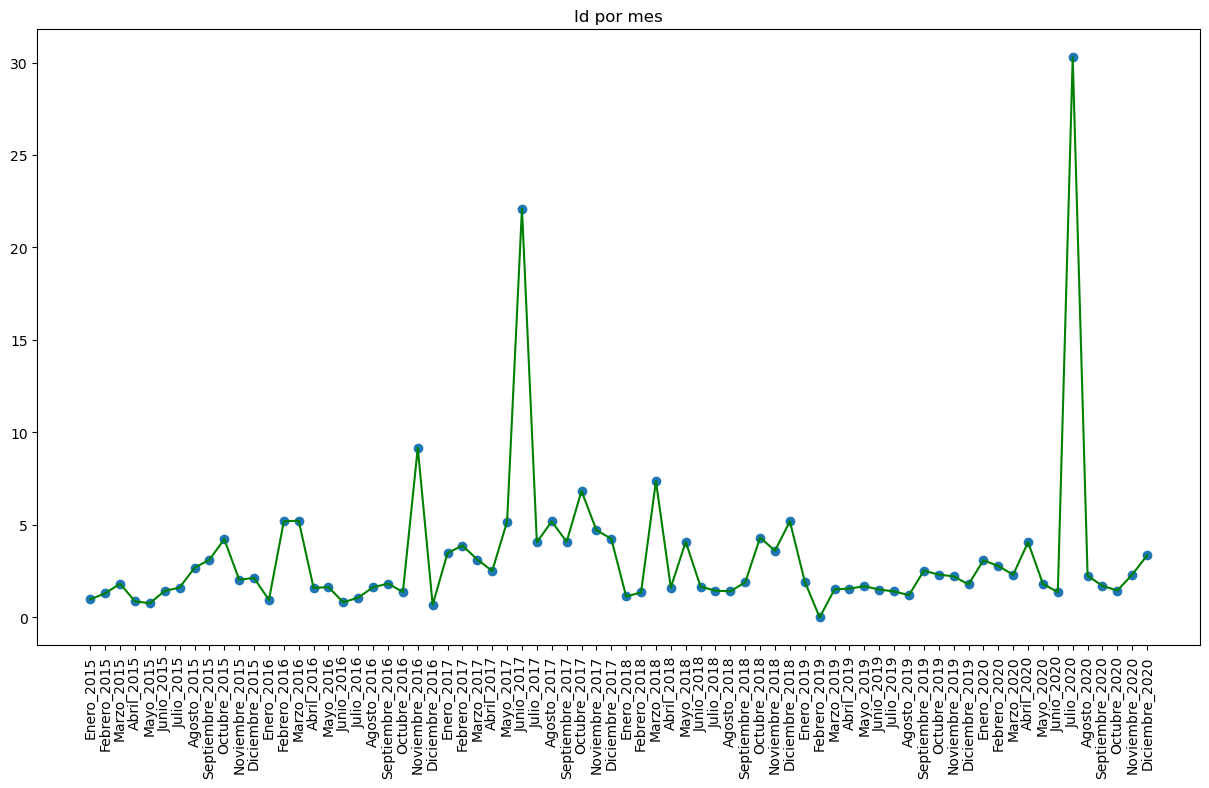

In [57]:
import matplotlib.pyplot as plt

# Convertir a Pandas
data_final_pd = df_final.toPandas()
data_final_pd['Mes_Año'] = pd.Categorical(data_final_pd['Mes_Año'], categories=mes_año, ordered=True)


plt.figure(figsize=(15, 8))
plt.scatter(data_final_pd['Mes_Año'], data_final_pd['Id por mes'])
plt.plot(data_final_pd['Mes_Año'], data_final_pd['Id por mes'], "-", color="green")
plt.title('Id por mes')
plt.xticks(rotation=90)
plt.show()

# Actividad 5

Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020. Nota : CM=pos*Diaph/Ntrampas, donde CM se refiere al centro de masa, pos es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideraron en el cálculo.

In [58]:
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
         "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Crear diccionarios para coordenadas
coordenadas_por_mes = {}
coordenadas_por_mes_2016 = {}
coordenadas_por_mes_2017 = {}
coordenadas_por_mes_2018 = {}
coordenadas_por_mes_2019 = {}
coordenadas_por_mes_2020 = {}

# Obtener coordenadas para cada mes en 2015
for mes in meses:
    coordenadas_por_mes[mes] = data_por_mes[mes].select("Ubicacion", "Latitud", "Longitud").dropDuplicates()

# Obtener coordenadas para cada mes en 2016
for mes in meses:
    coordenadas_por_mes_2016[mes] = data_por_mes_2016[mes].select("Ubicacion", "Latitud", "Longitud").dropDuplicates()

# Obtener coordenadas para cada mes en 2017
for mes in meses:
    coordenadas_por_mes_2017[mes] = data_por_mes_2017[mes].select("Ubicacion", "Latitud", "Longitud").dropDuplicates()

# Obtener coordenadas para cada mes en 2018
for mes in meses:
    coordenadas_por_mes_2018[mes] = data_por_mes_2018[mes].select("name_thue", "latitud", "longitud").dropDuplicates()

# Obtener coordenadas para cada mes en 2019
for mes in meses:
    coordenadas_por_mes_2019[mes] = data_por_mes_2019[mes].select("Ubicacion", "Latitud", "Longitud").dropDuplicates()

# Obtener coordenadas para cada mes en 2020
for mes in meses:
    coordenadas_por_mes_2020[mes] = data_por_mes_2020[mes].select("Ubicacion", "Latitud", "Longitud").dropDuplicates()

In [59]:
unidos_por_mes = {}
for mes in meses:
    unidos_por_mes[mes] = group_por_mes[mes].join(coordenadas_por_mes[mes], on='Ubicacion', how='left')

unidos_por_mes_2016 = {}
for mes in meses:
    unidos_por_mes_2016[mes] = group_por_mes_2016[mes].join(coordenadas_por_mes_2016[mes], on='Ubicacion', how='left')

unidos_por_mes_2017 = {}
for mes in meses:
    unidos_por_mes_2017[mes] = group_por_mes_2017[mes].join(coordenadas_por_mes_2017[mes], on='Ubicacion', how='left')

unidos_por_mes_2018 = {}
for mes in meses:
    unidos_por_mes_2018[mes] = group_por_mes_2018[mes].join(coordenadas_por_mes_2018[mes], on='name_thue', how='left')

unidos_por_mes_2019 = {}
for mes in meses:
    unidos_por_mes_2019[mes] = group_por_mes_2019[mes].join(coordenadas_por_mes_2019[mes], on='Ubicacion', how='left')

unidos_por_mes_2020 = {}
for mes in meses:
    unidos_por_mes_2020[mes] = group_por_mes_2020[mes].join(coordenadas_por_mes_2020[mes], on='Ubicacion', how='left')

In [60]:
unidos_por_mes["Enero"].show(5)

+--------------------+-------------------+--------+---------+
|           Ubicacion|Promedio Diaphorina| Latitud| Longitud|
+--------------------+-------------------+--------+---------+
|177_THUE05-28-030...|                0.0|24.11562| -99.0356|
|177_THUE05-28-030...|                0.2|24.11836|-99.03798|
|177_THUE05-28-019...|                0.5|23.24957|-98.81016|
|177_THUE05-28-041...|                0.0|23.92502|-99.17834|
|177_THUE05-28-030...|                0.0|24.11818|-99.03604|
+--------------------+-------------------+--------+---------+
only showing top 5 rows



In [61]:
unidos_por_mes_2016["Junio"].show(5)

+--------------------+-------------------+--------+---------+
|           Ubicacion|Promedio Diaphorina| Latitud| Longitud|
+--------------------+-------------------+--------+---------+
|177_THUE05-28-08-...|                0.6|23.70033|-98.84761|
|177_THUE05-28-08-...|                0.0|23.69938|-98.81893|
|177_THUE05-28-030...|                0.0|24.11279| -99.0727|
|177_THUE05-28-030...|                0.0|24.11606|-99.04561|
|177_THUE05-28-041...|                0.2|23.92448|-99.23349|
+--------------------+-------------------+--------+---------+
only showing top 5 rows



In [62]:
unidos_por_mes_2017["Agosto"].show(5)

+--------------------+-------------------+--------+---------+
|           Ubicacion|Promedio Diaphorina| Latitud| Longitud|
+--------------------+-------------------+--------+---------+
|177_THUE05-28-041...|                0.0|23.88461|-99.19024|
|177_THUE05-28-013...|                3.0|23.91517|-99.09628|
|177_THUE05-28-041...|                1.0|23.93902|-99.23357|
|177_THUE05-28-013...|                5.0|23.91558|-99.09633|
|177_THUE05-28-013...|                0.0|23.96124| -99.1092|
+--------------------+-------------------+--------+---------+
only showing top 5 rows



In [63]:
unidos_por_mes_2018["Octubre"].show(5)

+--------------------+-------------------+---------+---------+
|           name_thue|Promedio Diaphorina|  latitud| longitud|
+--------------------+-------------------+---------+---------+
|177_THUE05-28-013...|                0.0|24.011354|-99.26069|
|177_THUE05-28-013...|                0.0|23.998304|-99.25913|
|177_THUE05-28-013...|                0.0| 23.90386|-99.13455|
|177_THUE05-28-013...|                0.0| 24.07743|-99.16919|
|177_THUE05-28-013...|                0.0|23.981737|-99.14491|
+--------------------+-------------------+---------+---------+
only showing top 5 rows



In [64]:
unidos_por_mes_2019["Diciembre"].show(5)

+--------------------+-------------------+--------+---------+
|           Ubicacion|Promedio Diaphorina| Latitud| Longitud|
+--------------------+-------------------+--------+---------+
|THUE05/28-030/205...|                0.0|24.11683|-99.09647|
|THUE05/28-013/064...|                0.0|24.00742|-99.24981|
|THUE05/28-013/065...|                0.0|24.00795|-99.24178|
|THUE05/28-030/129...|                0.0|24.10474|-99.11819|
|THUE05/28-013/065...|                0.0|24.00803|-99.24144|
+--------------------+-------------------+--------+---------+
only showing top 5 rows



In [65]:
unidos_por_mes_2020["Febrero"].show(5)

+--------------------+-------------------+--------+----------+
|           Ubicacion|Promedio Diaphorina| Latitud|  Longitud|
+--------------------+-------------------+--------+----------+
|THUE05/28-013/065...|                0.0|24.00795| -99.24178|
|THUE05/28-013/064...|                0.0|24.00742| -99.24981|
|THUE05/28-030/131...|                1.5|24.04982|-99.040188|
|THUE05/28-016/036...|                1.0|24.11892|  -99.1906|
|THUE05/28-013/069...|                0.0| 24.0654|  -99.1222|
+--------------------+-------------------+--------+----------+
only showing top 5 rows



In [66]:
unidos_por_mes["Diciembre"].show(5)

+--------------------+-------------------+--------+---------+
|           Ubicacion|Promedio Diaphorina| Latitud| Longitud|
+--------------------+-------------------+--------+---------+
|177_THUE05-28-030...|                0.0|24.11606|-99.04561|
|177_THUE05-28-041...|                0.0|23.92448|-99.23349|
|177_THUE05-28-08-...|                0.0|23.70033|-98.84761|
|177_THUE05-28-019...|                0.0| 23.3105|-98.95122|
|177_THUE05-28-016...|                0.0|24.01357|-99.19001|
+--------------------+-------------------+--------+---------+
only showing top 5 rows



In [68]:
suma_Prod_X = {}
suma_Prod_Y = {}
suma_Prom = {}
CM_X={}
CM_Y={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `Longitud` AS `Prod X`,
        `Promedio Diaphorina` * `Latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X[mes] = result.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y[mes] = result.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom[mes] = result.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X[mes] = suma_Prod_X[mes] / suma_Prom[mes]
    CM_Y[mes] = suma_Prod_Y[mes] / suma_Prom[mes]

# Mostrar resultados

print("CM_X:", CM_X)
print("CM_Y:", CM_Y)

CM_X: {'Enero': -98.9474880139373, 'Febrero': -98.99824490052255, 'Marzo': -98.96272261605901, 'Abril': -99.00430819596355, 'Mayo': -99.0281153108808, 'Junio': -99.01097915615905, 'Julio': -98.9854447843144, 'Agosto': -99.03481920714685, 'Septiembre': -99.04089307408168, 'Octubre': -99.06221035373379, 'Noviembre': -99.05765973639343, 'Diciembre': -99.0750613616245}
CM_Y: {'Enero': 23.78112219512196, 'Febrero': 23.688303766388504, 'Marzo': 23.593429768878263, 'Abril': 23.656281981521868, 'Mayo': 23.744958307426593, 'Junio': 23.71466682832202, 'Julio': 23.67314820261453, 'Agosto': 23.87133233947515, 'Septiembre': 23.863749659347427, 'Octubre': 23.93498938796548, 'Noviembre': 23.96810270950818, 'Diciembre': 23.993902247535935}


In [69]:
suma_Prod_X_2016 = {}
suma_Prod_Y_2016 = {}
suma_Prom_2016 = {}
CM_X_2016={}
CM_Y_2016={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes_2016[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `Longitud` AS `Prod X`,
        `Promedio Diaphorina` * `Latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result_2016 = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X_2016[mes] = result_2016.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y_2016[mes] = result_2016.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom_2016[mes] = result_2016.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X_2016[mes] = suma_Prod_X_2016[mes] / suma_Prom_2016[mes]
    CM_Y_2016[mes] = suma_Prod_Y_2016[mes] / suma_Prom_2016[mes]

# Mostrar resultados

print("CM_X:", CM_X_2016)
print("CM_Y:", CM_Y_2016)

CM_X: {'Enero': -99.0704020472728, 'Febrero': -99.06204116974781, 'Marzo': -99.06419227889589, 'Abril': -99.07790093986021, 'Mayo': -99.07055230792051, 'Junio': -99.05582736754367, 'Julio': -99.01940341770137, 'Agosto': -99.06578657311002, 'Septiembre': -99.03993139155675, 'Octubre': -99.0742661343091, 'Noviembre': -98.90159388264672, 'Diciembre': -98.99692594150281}
CM_Y: {'Enero': 23.91263905330334, 'Febrero': 23.97034678655463, 'Marzo': 23.913050446584712, 'Abril': 23.96815012587415, 'Mayo': 23.929734259863515, 'Junio': 23.881093908010275, 'Julio': 23.819563525947157, 'Agosto': 23.886914285714333, 'Septiembre': 23.78324915948654, 'Octubre': 23.827358338355552, 'Noviembre': 23.44053585518103, 'Diciembre': 23.587213082512427}


In [70]:
suma_Prod_X_2017 = {}
suma_Prod_Y_2017 = {}
suma_Prom_2017 = {}
CM_X_2017={}
CM_Y_2017={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes_2017[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `Longitud` AS `Prod X`,
        `Promedio Diaphorina` * `Latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result_2017 = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X_2017[mes] = result_2017.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y_2017[mes] = result_2017.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom_2017[mes] = result_2017.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X_2017[mes] = suma_Prod_X_2017[mes] / suma_Prom_2017[mes]
    CM_Y_2017[mes] = suma_Prod_Y_2017[mes] / suma_Prom_2017[mes]

# Mostrar resultados

print("CM_X:", CM_X_2017)
print("CM_Y:", CM_Y_2017)

CM_X: {'Enero': -99.10533600000005, 'Febrero': -99.12056924332356, 'Marzo': -99.11744564795333, 'Abril': -99.10579642161635, 'Mayo': -99.12151494779127, 'Junio': -99.1168344004031, 'Julio': -99.13431264504335, 'Agosto': -99.11220326148892, 'Septiembre': -99.11494500000005, 'Octubre': -99.10390921303666, 'Noviembre': -99.11363682246127, 'Diciembre': -99.142910105062}
CM_Y: {'Enero': 23.99505576146789, 'Febrero': 23.991330811078154, 'Marzo': 23.985190584047903, 'Abril': 24.02058069133396, 'Mayo': 23.973507997322656, 'Junio': 23.946819662411833, 'Julio': 23.941870671539483, 'Agosto': 23.99508815372114, 'Septiembre': 23.981503465473153, 'Octubre': 23.983087122416517, 'Noviembre': 23.952803268325525, 'Diciembre': 23.978956580706754}


In [71]:
suma_Prod_X_2018 = {}
suma_Prod_Y_2018 = {}
suma_Prom_2018 = {}
CM_X_2018={}
CM_Y_2018={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes_2018[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `longitud` AS `Prod X`,
        `Promedio Diaphorina` * `latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result_2018 = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X_2018[mes] = result_2018.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y_2018[mes] = result_2018.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom_2018[mes] = result_2018.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X_2018[mes] = suma_Prod_X_2018[mes] / suma_Prom_2018[mes]
    CM_Y_2018[mes] = suma_Prod_Y_2018[mes] / suma_Prom_2018[mes]

# Mostrar resultados

print("CM_X:", CM_X_2018)
print("CM_Y:", CM_Y_2018)

CM_X: {'Enero': -99.1687670611954, 'Febrero': -99.13223942185077, 'Marzo': -99.12603037255471, 'Abril': -99.07445489733983, 'Mayo': -99.0747866663438, 'Junio': -99.11107419508414, 'Julio': -99.11495788137964, 'Agosto': -99.1162054602359, 'Septiembre': -99.0842888176205, 'Octubre': -99.09754377012949, 'Noviembre': -99.11199766091647, 'Diciembre': -99.10664531694101}
CM_Y: {'Enero': 23.956231624386504, 'Febrero': 23.887882468323994, 'Marzo': 23.850075158208544, 'Abril': 23.835488863054188, 'Mayo': 23.82245022243076, 'Junio': 23.890805743663492, 'Julio': 23.87960035982266, 'Agosto': 23.86015767191664, 'Septiembre': 23.82140690945643, 'Octubre': 23.88514131852937, 'Noviembre': 23.919810120501534, 'Diciembre': 23.955832335177448}


In [72]:
suma_Prod_X_2019 = {}
suma_Prod_Y_2019 = {}
suma_Prom_2019 = {}
CM_X_2019={}
CM_Y_2019={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes_2019[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `Longitud` AS `Prod X`,
        `Promedio Diaphorina` * `Latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result_2019 = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X_2019[mes] = result_2019.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y_2019[mes] = result_2019.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom_2019[mes] = result_2019.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X_2019[mes] = suma_Prod_X_2019[mes] / suma_Prom_2019[mes] if suma_Prom_2019[mes] != 0 else 0
    CM_Y_2019[mes] = suma_Prod_Y_2019[mes] / suma_Prom_2019[mes] if suma_Prom_2019[mes] != 0 else 0

# Mostrar resultados

print("CM_X:", CM_X_2019)
print("CM_Y:", CM_Y_2019)

CM_X: {'Enero': -99.12886178656554, 'Febrero': 0, 'Marzo': -99.11533596453909, 'Abril': -99.1067970421053, 'Mayo': -99.14210671307772, 'Junio': -99.13983290968596, 'Julio': -99.15088399268966, 'Agosto': -99.13380590995666, 'Septiembre': -99.09455233962257, 'Octubre': -99.10699558609956, 'Noviembre': -99.10753872227049, 'Diciembre': -99.10017325875188}
CM_Y: {'Enero': 23.93773499597287, 'Febrero': 0, 'Marzo': 23.895845218676108, 'Abril': 23.88568006710524, 'Mayo': 23.89145056764371, 'Junio': 23.879247189790586, 'Julio': 23.935220374352777, 'Agosto': 23.889263407792193, 'Septiembre': 23.80406691490936, 'Octubre': 23.847430619813252, 'Noviembre': 23.89207962119895, 'Diciembre': 23.8938837539781}


In [73]:
suma_Prod_X_2020 = {}
suma_Prod_Y_2020 = {}
suma_Prom_2020 = {}
CM_X_2020={}
CM_Y_2020={}
for mes in meses:
    # Crear la vista temporal para cada mes
    unidos_por_mes_2020[mes].createOrReplaceTempView(mes)

    # Consulta SQL para multiplicar las columnas
    query = f"""
    SELECT 
        `Promedio Diaphorina`,
        `Promedio Diaphorina` * `Longitud` AS `Prod X`,
        `Promedio Diaphorina` * `Latitud` AS `Prod Y`
    FROM 
        {mes}
    """

    # Ejecutar la consulta SQL en Spark
    result_2020 = spark.sql(query)
    #result.show()

    # Calcular la suma de cada columna
    suma_Prod_X_2020[mes] = result_2020.agg(sum("Prod X").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prod_Y_2020[mes] = result_2020.agg(sum("Prod Y").alias("Suma_Total")).collect()[0]["Suma_Total"]
    suma_Prom_2020[mes] = result_2020.agg(sum("Promedio Diaphorina").alias("Suma_Total")).collect()[0]["Suma_Total"]

    # Calcular los valores de CM_X y CM_Y
    CM_X_2020[mes] = suma_Prod_X_2020[mes] / suma_Prom_2020[mes] if suma_Prom_2020[mes] != 0 else 0
    CM_Y_2020[mes] = suma_Prod_Y_2020[mes] / suma_Prom_2020[mes] if suma_Prom_2020[mes] != 0 else 0

# Mostrar resultados

print("CM_X:", CM_X_2020)
print("CM_Y:", CM_Y_2020)

CM_X: {'Enero': -99.07160745404599, 'Febrero': -99.06864252708424, 'Marzo': -99.09859397680655, 'Abril': -99.11131602269688, 'Mayo': -99.1029142217101, 'Junio': -99.09253569957346, 'Julio': -99.0661547331755, 'Agosto': -99.08540942034989, 'Septiembre': -99.10421527400135, 'Octubre': -99.09405250060313, 'Noviembre': -99.03520114633385, 'Diciembre': -99.02919484523949}
CM_Y: {'Enero': 23.768987902897123, 'Febrero': 23.79501631953741, 'Marzo': 23.856914905761705, 'Abril': 23.910357379505978, 'Mayo': 23.820251256016405, 'Junio': 23.844651350396123, 'Julio': 24.082929978093553, 'Agosto': 23.77766266436464, 'Septiembre': 23.816521379832444, 'Octubre': 23.776990512665808, 'Noviembre': 23.758319176148472, 'Diciembre': 23.721850554444384}


In [74]:
dictsX = [CM_X, CM_X_2016, CM_X_2017, CM_X_2018, CM_X_2019, CM_X_2020]
dictsY = [CM_Y, CM_Y_2016, CM_Y_2017, CM_Y_2018, CM_Y_2019, CM_Y_2020]

years = [2015, 2016, 2017, 2018, 2019, 2020]

mes_año = []
valoresX = []
valoresY = []


for i, dic in enumerate(dictsX):
    for mes, valor in dic.items():
        mes_año.append(f"{mes}_{years[i]}")  # Combinar mes y año en una sola string
        valoresX.append(float(valor))           # Asegurarse de que todos los valores sean flotantes
        
for i, dic in enumerate(dictsY):
    for mes, valor in dic.items():
        valoresY.append(float(valor))           # Asegurarse de que todos los valores sean flotantes


# Crear data2 como una lista de tuplas
data3 = list(zip(mes_año, valoresX, valoresY))

# Crear el DataFrame
df_final_5 = spark.createDataFrame(data3, ["Mes_Año", "CM en X","CM en Y"])

# Mostrar el DataFrame
df_final_5.show(72)

+---------------+------------------+------------------+
|        Mes_Año|           CM en X|           CM en Y|
+---------------+------------------+------------------+
|     Enero_2015| -98.9474880139373| 23.78112219512196|
|   Febrero_2015|-98.99824490052255|23.688303766388504|
|     Marzo_2015|-98.96272261605901|23.593429768878263|
|     Abril_2015|-99.00430819596355|23.656281981521868|
|      Mayo_2015| -99.0281153108808|23.744958307426593|
|     Junio_2015|-99.01097915615905| 23.71466682832202|
|     Julio_2015| -98.9854447843144| 23.67314820261453|
|    Agosto_2015|-99.03481920714685| 23.87133233947515|
|Septiembre_2015|-99.04089307408168|23.863749659347427|
|   Octubre_2015|-99.06221035373379| 23.93498938796548|
| Noviembre_2015|-99.05765973639343| 23.96810270950818|
| Diciembre_2015| -99.0750613616245|23.993902247535935|
|     Enero_2016| -99.0704020472728| 23.91263905330334|
|   Febrero_2016|-99.06204116974781| 23.97034678655463|
|     Marzo_2016|-99.06419227889589|23.913050446

Al momento de graficar, febrero de 2019 representa un problema, ya que es un outlier que altera drásticamente la escala de nuestra gráfica. Por este motivo, hemos decidido eliminarlo en favor de una mejor legibilidad de las gráficas.

In [75]:
# Filtrar filas donde 'CM en X' o 'CM en Y' no sean 0
df_final_5_filtro = df_final_5.filter((df_final_5["CM en X"] != 0) & (df_final_5["CM en Y"] != 0))

# Mostrar el resultado
df_final_5_filtro.show(72)

+---------------+------------------+------------------+
|        Mes_Año|           CM en X|           CM en Y|
+---------------+------------------+------------------+
|     Enero_2015| -98.9474880139373| 23.78112219512196|
|   Febrero_2015|-98.99824490052255|23.688303766388504|
|     Marzo_2015|-98.96272261605901|23.593429768878263|
|     Abril_2015|-99.00430819596355|23.656281981521868|
|      Mayo_2015| -99.0281153108808|23.744958307426593|
|     Junio_2015|-99.01097915615905| 23.71466682832202|
|     Julio_2015| -98.9854447843144| 23.67314820261453|
|    Agosto_2015|-99.03481920714685| 23.87133233947515|
|Septiembre_2015|-99.04089307408168|23.863749659347427|
|   Octubre_2015|-99.06221035373379| 23.93498938796548|
| Noviembre_2015|-99.05765973639343| 23.96810270950818|
| Diciembre_2015| -99.0750613616245|23.993902247535935|
|     Enero_2016| -99.0704020472728| 23.91263905330334|
|   Febrero_2016|-99.06204116974781| 23.97034678655463|
|     Marzo_2016|-99.06419227889589|23.913050446

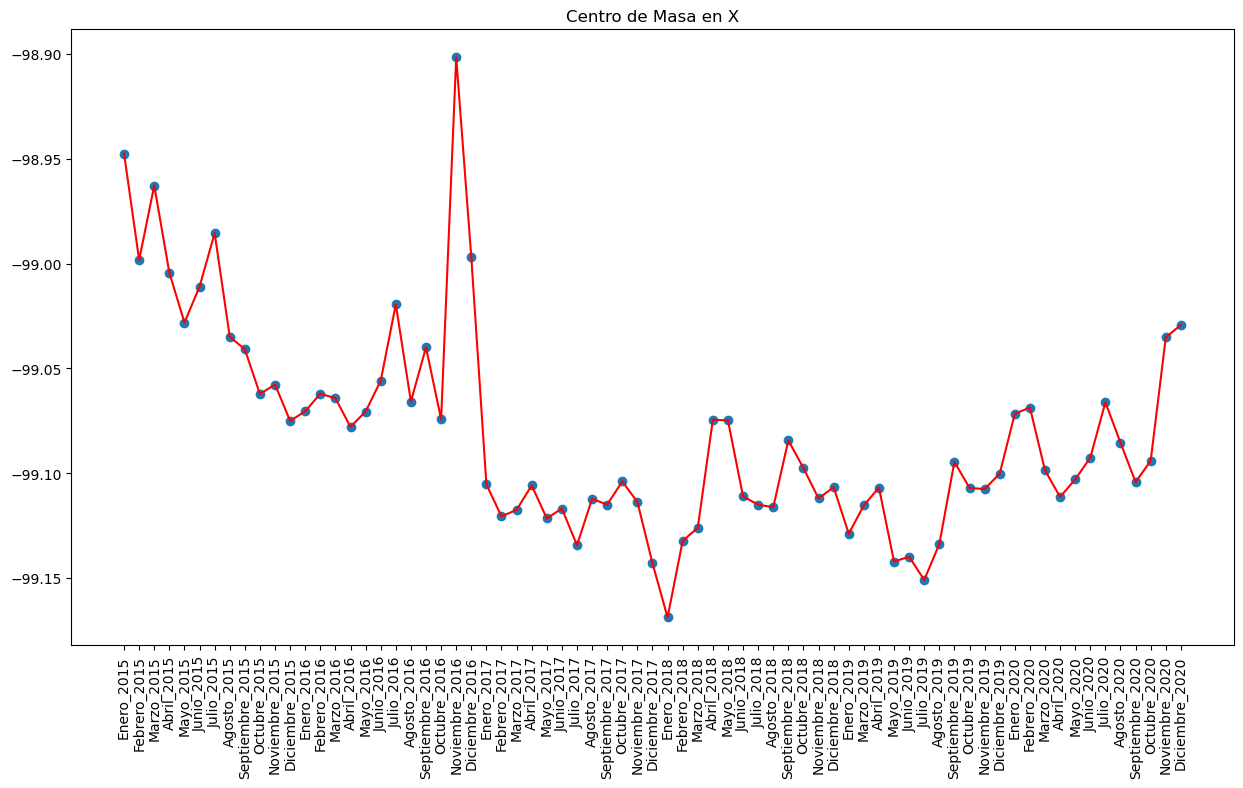

In [76]:
import matplotlib.pyplot as plt

mes_año.remove('Febrero_2019') #quitamos a febrero_2019 de la lista de los meses_año

# Convertir tabla2015 a Pandas
data_final_5_pd = df_final_5_filtro.toPandas()
data_final_5_pd['Mes_Año'] = pd.Categorical(data_final_5_pd['Mes_Año'], categories=mes_año, ordered=True)


plt.figure(figsize=(15, 8))
plt.scatter(data_final_5_pd['Mes_Año'], data_final_5_pd['CM en X'])
plt.plot(data_final_5_pd['Mes_Año'], data_final_5_pd['CM en X'], "-", color="red")
plt.title('Centro de Masa en X')
plt.xticks(rotation=90)
plt.show()


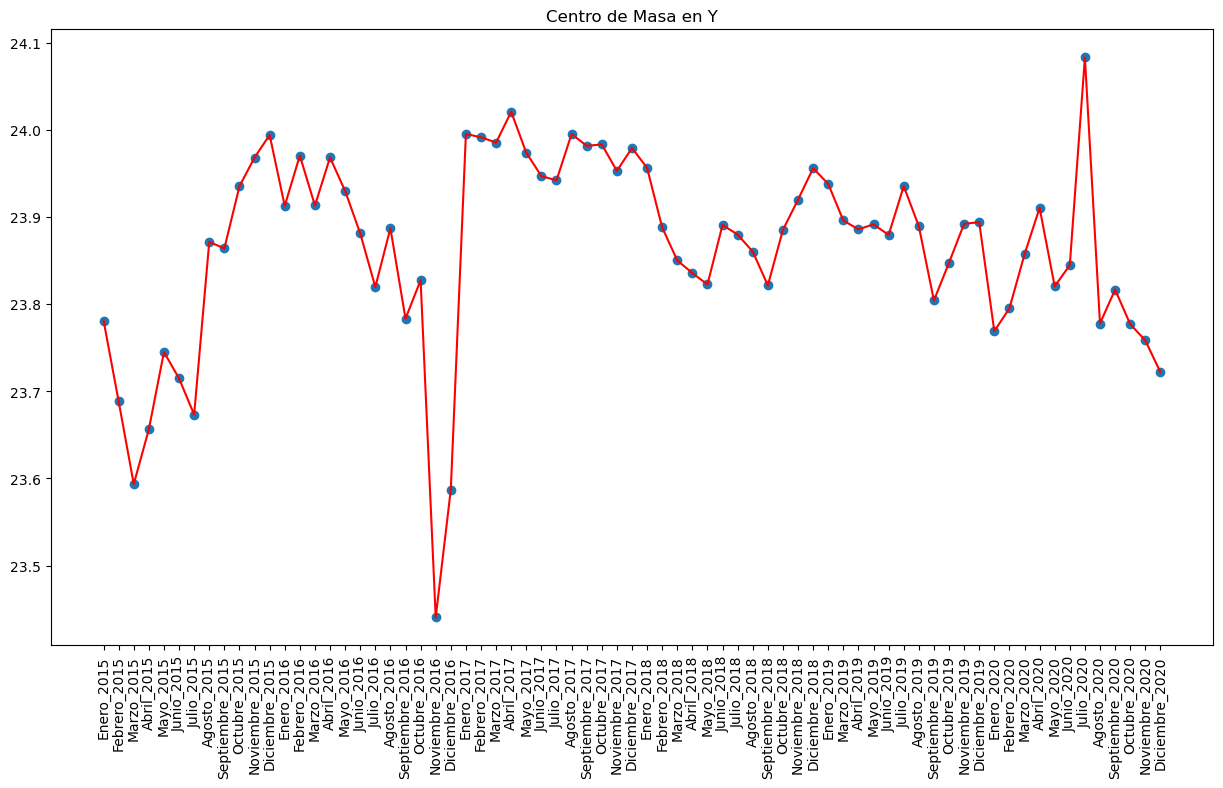

In [77]:
import matplotlib.pyplot as plt

data_final_5_pd['Mes_Año'] = pd.Categorical(data_final_5_pd['Mes_Año'], categories=mes_año, ordered=True)


# Convertir tabla2015 a Pandas
data_final_5_pd = df_final_5_filtro.toPandas()


plt.figure(figsize=(15, 8))
plt.scatter(data_final_5_pd['Mes_Año'], data_final_5_pd['CM en Y'])
plt.plot(data_final_5_pd['Mes_Año'], data_final_5_pd['CM en Y'], "-", color="red")
plt.title('Centro de Masa en Y')
plt.xticks(rotation=90)
plt.show()


In [78]:
spark.stop()